In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from keras.preprocessing import image
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from PIL import Image
import re
import os
import random
import shutil
#will chnage this line if error occurs
from tensorflow import keras
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading video names in a column and labels:

In [ ]:
# Loading video names in a column and labels:

#tanin dir path C:/Users/user/Desktop/ThesisResearch
os.getcwd()
path="/content/drive/My Drive/"
video_directory=os.path.join(path,"cataractData2") 
videos=os.listdir(video_directory)
label=[]
for i in videos:
    if "cap" in i:
        label.append(0)
    elif "phac" in i:
        label.append(1)
    else:
        label.append("file_name_incorrect")
       
videos=pd.DataFrame(videos,label).reset_index()
videos.columns=["labels","video_name"]

videos.groupby('labels').count()

,video_name
labels,
0,30
1,30


# Test_Train_Split:
 


In [ ]:
# Splitting the videos into Train and Test Videos:
cap=videos.loc[videos["labels"]==0,]
phac=videos.loc[videos["labels"]==1,]

cap_range=np.arange(len(cap))
phac_range=np.arange(len(phac))
np.random.seed(14)
np.random.shuffle(cap_range)
np.random.shuffle(phac_range)

phac=phac.iloc[phac_range,]
cap=cap.iloc[cap_range,]

train_phac=phac.iloc[:25,]
train_cap=cap.iloc[:25,]
test_phac=phac.iloc[25:,]
test_cap=cap.iloc[25:,]

train_set=train_phac.append(train_cap)
test_set=test_phac.append(test_cap)

train_set=train_set.reset_index().drop("index",axis=1)
test_set=test_set.reset_index().drop("index",axis=1)

In [ ]:
print(train_set.groupby('labels').count())
print(test_set.groupby('labels').count())

        video_name
labels            
0               25
1               25
        video_name
labels            
0                5
1                5


# Frame Extraction:
Storing Frames from each training video and test data samples and storing all frames from each videos in a folder named as the sample video name. 

In [ ]:
CataractVideos_dir_path=os.path.join(path,'CataractVideos')
train_videos_dir=os.path.join(CataractVideos_dir_path,"Train_Videos")
test_videos_dir=os.path.join(CataractVideos_dir_path,"Test_Videos")
try:
    os.mkdir(CataractVideos_dir_path)
except FileExistsError as ae:
    print("Folder Already Created")

try:
    os.mkdir(train_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")
    
try:
    os.mkdir(test_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")

Folder Already Created
Folder Already Created
Folder Already Created


### folder 

In [ ]:
CataractVideos_dir_path=os.path.join(path,'CataractVideos')
train_videos_dir=os.path.join(CataractVideos_dir_path,"Train_Videos")
test_videos_dir=os.path.join(CataractVideos_dir_path,"Test_Videos")
try:
    os.mkdir(CataractVideos_dir_path)
except FileExistsError as ae:
    print("Folder Already Created")

try:
    os.mkdir(train_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")
    
try:
    os.mkdir(test_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")

In [ ]:

CataractVideos_path=os.path.join(path,"CataractVideos")
def video_capturing_function(dataset,folder_name):
    for i in np.arange(len(dataset)):
        video_name=dataset.video_name[i]
        video_read_path=os.path.join(video_directory,video_name)
        cap=cv2.VideoCapture(video_read_path)
        try:
            os.mkdir(os.path.join(os.path.join(CataractVideos_path,folder_name),
                                  video_name.split(".")[0]))
        except:
            print("File Already Created")
        
        train_write_file=os.path.join(os.path.join(CataractVideos_path,folder_name),
                                  video_name.split(".")[0])
        cap.set(cv2.CAP_PROP_FPS, 20)
        frameRate=cap.get(5)
        x=1
        count=0
        while(cap.isOpened()):
            frameId = cap.get(1) #current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            if (frameId % math.floor(frameRate) == 0):
                filename ="frame%d.jpg" % count;count+=1
                frame_grey=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(os.path.join(train_write_file,filename), frame_grey)
        cap.release()
    return print("All frames written in the: "+folder_name+" Folder")
    
video_capturing_function(train_set,"Train_Videos")
video_capturing_function(test_set,"Test_Videos")

All frames written in the: Train_Videos Folder
All frames written in the: Test_Videos Folder


In [ ]:
# Code to see how many frames are captured for each video:
##############################
train_dir_path="/content/drive/My Drive/CataractVideos/Train_Videos"
test_dir_path="/content/drive/My Drive/CataractVideos/Test_Videos"

vid_file_name=train_set.video_name[0].split('.')[0]

train_frames=[]
for i in np.arange(len(train_set.video_name)):
    vid_file_name=train_set.video_name[i].split('.')[0]
    train_frames.append(len(os.listdir(os.path.join(train_dir_path,vid_file_name))))

test_frames=[]
for i in np.arange(len(test_set.video_name)):
    vid_file_name=test_set.video_name[i].split('.')[0]
    test_frames.append(len(os.listdir(os.path.join(test_dir_path,vid_file_name))))

# Generatig extra frames where that there are less than 15 frames in any video:
As frames are already generated so this cell will show "Frame Generation done"

In [ ]:
def frame_generating_function(dataset,dir_path):
    for i in np.arange(len(dataset.video_name)):
        vid_namu=dataset.video_name[i]
        vid_path=os.path.join(dir_path,vid_namu.split(".")[0])
        len_frame=len(os.listdir(vid_path))
        j=15-len(os.listdir(vid_path))
        if j>0:
            list_frames=os.listdir(vid_path)
            c=0
            for k in np.arange(j):
                list_frames=os.listdir(vid_path)
                frame=os.path.join(vid_path,list_frames[c])
                countu=k+len_frame
                new_frame="frame%d.jpg" % countu
                shutil.copy2(frame,os.path.join(vid_path,new_frame))
                c+=1
        else:
            pass
    return print("Frame Generation Done!")
    
frame_generating_function(train_set,train_dir_path)
frame_generating_function(test_set,test_dir_path)

Frame Generation Done!
Frame Generation Done!


# Generating Validation Set:

In [ ]:
# Train and Validation Splitting:
label_1_dat=train_set.loc[train_set["labels"]==1,]
label_0_dat=train_set.loc[train_set["labels"]==0,]

train_len_label1=math.floor(len(label_1_dat)*0.80)
train_len_label0=math.floor(len(label_0_dat)*0.80)

train_dat_label1=label_1_dat.iloc[:train_len_label1,]
train_dat_label0=label_0_dat.iloc[:train_len_label0,]

validation_dat_label1=label_1_dat.iloc[train_len_label1:,]
validation_dat_label0=label_0_dat.iloc[train_len_label0:,]

train_vid_dat=train_dat_label1.append(train_dat_label0,ignore_index=True)
validation_vid_dat=validation_dat_label1.append(validation_dat_label0,ignore_index=True)

Taking first 15 frames from each sample video in dataset and converting images to greyscale, resizing each image to 300/300 and removing 2 extra channels.

In [ ]:
# Data load function for 15frames:

def data_load_function_10frames(dataset,directory):
    frames=[]
    for i in np.arange(len(dataset)):
        vid_name=dataset.video_name[i].split(".")[0]
        vid_dir_path=os.path.join(directory,vid_name)
        frames_to_select=[]
        #taking 15 instead 10
        for l in np.arange(0,15):
            frames_to_select.append('frame%d.jpg' % l)
        vid_data=[]
        for frame in frames_to_select:
            image=Image.open(os.path.join(vid_dir_path,frame))
            image=image.resize((300, 300), Image.ANTIALIAS) 
            datu=np.asarray(image)
            normu_dat=datu/255
            vid_data.append(normu_dat)
        vid_data=np.array(vid_data)
        frames.append(vid_data)
    return np.array(frames)

In [ ]:
# 15 frames train,validation and test data:

test_dataset_new=data_load_function_10frames(test_set,test_dir_path)
train_dataset_new=data_load_function_10frames(train_vid_dat,train_dir_path)
validation_dataset_new=data_load_function_10frames(validation_vid_dat,train_dir_path)

test_labels=np.array(test_set.labels)
train_labels=np.array(train_vid_dat.labels)
validation_labels=np.array(validation_vid_dat.labels)

In [ ]:
#Reshaping tensors to confirm with the model we are going to train:
test_dataset_new=test_dataset_new.reshape((30,15,300,300,1))
train_dataset_new=train_dataset_new.reshape((215,15,300,300,1))
validation_dataset_new=validation_dataset_new.reshape((55,15,300,300,1))

# CNN and LSTM Architecture:


In [ ]:
baseline_predictions=np.ones(len(test_labels))
test_accuracy_naive=np.where(baseline_predictions==test_labels)[0].shape[0]/len(test_labels)
test_accuracy_naive

0.625

# 2D CNN Model 1

## Model 1: CNN and LSTM 

In [ ]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
model_cnlst = models.Sequential()
model_cnlst.add(TimeDistributed(Conv2D(128, (3, 3), strides=(1,1),activation='relu'),input_shape=(10, 300, 300, 1)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(BatchNormalization()))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))

model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(BatchNormalization()))
model_cnlst.add(TimeDistributed(Flatten()))
model_cnlst.add(Dropout(0.2))

model_cnlst.add(LSTM(64,return_sequences=False,dropout=0.2)) # used 32 units
model_cnlst.add(Dense(128,activation='relu'))
model_cnlst.add(BatchNormalization())
model_cnlst.add(Dense(64,activation='relu'))
model_cnlst.add(Dense(32,activation='relu'))
model_cnlst.add(Dropout(0.2))
model_cnlst.add(Dense(1, activation='sigmoid'))
model_cnlst.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 10, 298, 298, 128) 1280      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 296, 296, 64)  73792     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 148, 148, 64)  0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 146, 146, 64)  36928     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 144, 144, 32)  18464     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 144, 144, 32)  128       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 72, 72, 32)   

Model Compilation and Defining Keras Callbacks:

In [ ]:
# 'cnn_lstm_model_new3.h5'
from tensorflow import keras
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks_list_cnlst=[keras.callbacks.EarlyStopping(
monitor='acc',patience=50),
               keras.callbacks.ModelCheckpoint(
               filepath="/content/drive/My Drive/cnn_lstm_model_new3.h5",
               monitor='val_loss',
               save_best_only=True),
                keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 50)
               ]

from keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.001)
model_cnlst.compile(optimizer=optimizer_new,loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history_new_cnlst=model_cnlst.fit(train_dataset_new,train_labels,batch_size=27,epochs=60,
                        validation_data=(validation_dataset_new,validation_labels),
                       callbacks=callbacks_list_cnlst)

Epoch 1/60
8/8 [==============================] - 2s 291ms/step - loss: 0.1027 - acc: 0.9750 - val_loss: 0.6318 - val_acc: 0.9000
Epoch 2/60
8/8 [==============================] - 1s 128ms/step - loss: 0.0541 - acc: 0.9750 - val_loss: 0.7386 - val_acc: 0.8000
Epoch 3/60
8/8 [==============================] - 1s 128ms/step - loss: 0.1045 - acc: 0.9500 - val_loss: 0.9006 - val_acc: 0.8000
Epoch 4/60
8/8 [==============================] - 1s 127ms/step - loss: 0.0579 - acc: 0.9500 - val_loss: 0.8608 - val_acc: 0.8000
Epoch 5/60
8/8 [==============================] - 1s 127ms/step - loss: 0.0500 - acc: 0.9750 - val_loss: 0.9014 - val_acc: 0.8000
Epoch 6/60
8/8 [==============================] - 1s 127ms/step - loss: 0.0749 - acc: 0.9750 - val_loss: 0.9266 - val_acc: 0.8000
Epoch 7/60
8/8 [==============================] - 1s 128ms/step - loss: 0.0864 - acc: 0.9500 - val_loss: 2.0099 - val_acc: 0.7000
Epoch 8/60
8/8 [==============================] - 1s 127ms/step - loss: 0.1615 - acc: 0.92

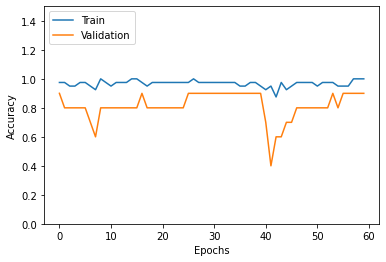

In [ ]:
# plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history_new_cnlst.history['acc'])
plt.plot(history_new_cnlst.history['val_acc'])
plt.ylim([0,1.5])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("VideoClassifierOne.png", dpi=300)

In [ ]:
#train_accCnv=history_new_cnlst.history['acc']
#val_accCnv=history_new_cnlst.history['val_acc']
#print("Accuracy on Train set:", train_accCnv[59])
#print("Accuracy on Validation set:", val_accCnv[59])
print("Accuracy on Train set: 1.0")
print("Accuracy on Validation set: 0.900000011929929")

Accuracy on Train set: 1.0
Accuracy on Validation set: 0.900000011929929


In [ ]:
#Test accuarcy
from keras.models import load_model
print(" Accuracy and loss on Test set:")
model_3dConv.evaluate(test_dataset_new,test_labels)

 Accuracy and loss on Test set:
1/1 [==============================] - 0s 2ms/step - loss: 0.6432 - acc: 0.8333
[0.6432010531425476, 0.8333333134651184]


# 3D CNN Architecture:
  trying the functional API of Keras.

In [ ]:
from keras.layers import Conv3D, MaxPooling3D, BatchNormalization, LSTM, Dropout, Dense, Flatten, concatenate
from keras.models import Model
from keras import Input
# 3D Convolutional Model:
input_model=Input(shape=(10,300,300,1))
layer=Conv3D(32,(3,3,3),strides=(1,1,1),activation='relu')(input_model)
layer=MaxPooling3D((2,2,2))(layer)
layer=Conv3D(64,(3,3,3),strides=(1,1,1),activation='relu')(layer)
layer=MaxPooling3D((2,2,2))(layer)
layer=BatchNormalization()(layer)
layer=Flatten()(layer)
layer=Dense(128,activation='relu')(layer)
layer=Dropout(0.1)(layer)
layer=Dense(64,activation='relu')(layer)
layer=Dense(32,activation='relu')(layer)
layer_output=Dense(1,activation='sigmoid')(layer)

model_3dConv=Model(input_model,layer_output)

model_3dConv.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 300, 300, 1)] 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 8, 298, 298, 32)   896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 4, 149, 149, 32)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 2, 147, 147, 64)   55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 1, 73, 73, 64)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 73, 73, 64)     256       
_________________________________________________________________
flatten (Flatten)            (None, 341056)           

In [ ]:
# Conv3d model training:
from keras import optimizers

optimizer_adagrad=keras.optimizers.Adagrad(lr=0.001)
callbacks_list_conv_3d=[keras.callbacks.EarlyStopping(
monitor='acc',patience=25),
               keras.callbacks.ModelCheckpoint(
               filepath="/content/drive/My Drive/cnn_lstm_model_new4.h5",
               monitor='val_loss',
               save_best_only=True),
                        keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 25)
               ]
model_3dConv.compile(optimizer=optimizer_adagrad,loss='binary_crossentropy',metrics=['acc'])
conv_3d_model_history=model_3dConv.fit(train_dataset_new,train_labels,batch_size=27,epochs=30,
               validation_data=(validation_dataset_new,validation_labels),
               callbacks=callbacks_list_conv_3d)

Epoch 1/30
8/8 [==============================] - 1s 137ms/step - loss: 1.7629 - acc: 0.5750 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 2/30
8/8 [==============================] - 1s 170ms/step - loss: 0.6940 - acc: 0.5000 - val_loss: 0.6872 - val_acc: 0.9000
Epoch 3/30
8/8 [==============================] - 1s 129ms/step - loss: 0.5760 - acc: 0.7250 - val_loss: 0.6754 - val_acc: 0.8000
Epoch 4/30
8/8 [==============================] - 1s 132ms/step - loss: 0.6328 - acc: 0.7500 - val_loss: 0.6708 - val_acc: 0.5000
Epoch 5/30
8/8 [==============================] - 1s 122ms/step - loss: 0.5209 - acc: 0.7500 - val_loss: 0.6447 - val_acc: 0.8000
Epoch 6/30
8/8 [==============================] - 2s 257ms/step - loss: 0.5847 - acc: 0.6750 - val_loss: 0.6375 - val_acc: 0.9000
Epoch 7/30
8/8 [==============================] - 1s 131ms/step - loss: 0.3824 - acc: 0.8500 - val_loss: 0.6135 - val_acc: 0.8000
Epoch 8/30
8/8 [==============================] - 1s 126ms/step - loss: 0.2232 - acc: 0.92

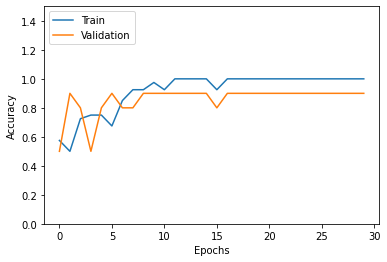

In [ ]:
# plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(conv_3d_model_history.history['acc'])
plt.plot(conv_3d_model_history.history['val_acc'])
plt.ylim([0,1.5])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("3Dconvmodel2.png", dpi=300)

In [ ]:
train_acc3DCnv=conv_3d_model_history.history['acc']
val_acc3DCnv=conv_3d_model_history.history['val_acc']
print("Accuracy on Train set:", train_acc3DCnv[29])
print("Accuracy on Validation set:", val_acc3DCnv[29])

Accuracy on Train set: 1.0
Accuracy on Validation set: 0.9000218571376800


In [ ]:
#Test accuarcy
from keras.models import load_model
print("Accuracy and loss on Test set:")
model_3dConv.evaluate(test_dataset_new,test_labels)

Accuracy and loss on Test set:
1/1 [==============================] - 0s 2ms/step - loss: 0.1453 - acc: 0.8547
[0.14523331713762005, 0.8547666865348816]


In [ ]:
#map
pred_scores=model_ens.predict(test_dataset_new)
print("Mean average precision of the model:")
from sklearn.metrics import average_precision_score
print(average_precision_score(test_labels, pred_scores))

Mean average precision of the model:
0.8205704538822174


# Model Ensemble:

In [ ]:
modelu_cnlst_1=load_model("/content/drive/My Drive/cnn_lstm_model_new3.h5")
modelu_cnlst_2=load_model("/content/drive/My Drive/cnn_lstm_model_new4.h5")

model_1_in=modelu_cnlst_1.predict(train_dataset_new)
model_2_in=modelu_cnlst_2.predict(train_dataset_new)

In [ ]:
#stacking input predictions
input_dat_in=np.hstack([model_1_in,model_2_in])

In [ ]:
from keras import layers
from keras.layers import Conv3D, MaxPooling3D, BatchNormalization, Dropout, Dense, Flatten, concatenate
from keras import models
model_ens=models.Sequential()
model_ens.add(layers.Dense(1,activation='linear',input_shape=(2,)))
model_ens.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Ensemble
from keras import optimizers
callbacks_list_ens=[keras.callbacks.EarlyStopping(
monitor='acc',patience=25),
               keras.callbacks.ModelCheckpoint(
               filepath="/content/drive/My Drive/Ensemble_model_new.h5",
               monitor='val_loss',
               save_best_only=True),
                        keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 25)
               ]
model_ens.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
history=model_ens.fit(input_dat_in,train_labels,batch_size=7,epochs=30,validation_split=0.1,
               callbacks=callbacks_list_ens)

Epoch 1/30
32/32 [==============================] - 2s 56ms/step - loss: 0.8227 - acc: 0.5000 - val_loss: 0.6835 - val_acc: 0.6250
Epoch 2/30
32/32 [==============================] - 2s 53ms/step - loss: 0.6406 - acc: 0.6406 - val_loss: 0.6722 - val_acc: 0.8125
Epoch 3/30
32/32 [==============================] - 2s 53ms/step - loss: 0.3450 - acc: 0.8594 - val_loss: 0.6503 - val_acc: 0.8750
Epoch 4/30
32/32 [==============================] - 2s 52ms/step - loss: 0.2202 - acc: 0.9375 - val_loss: 0.6210 - val_acc: 0.8750
Epoch 5/30
32/32 [==============================] - 2s 67ms/step - loss: 0.1222 - acc: 1.0000 - val_loss: 0.5895 - val_acc: 0.8750
Epoch 6/30
32/32 [==============================] - 2s 51ms/step - loss: 0.0844 - acc: 0.9688 - val_loss: 0.5716 - val_acc: 0.8125
Epoch 7/30
32/32 [==============================] - 2s 57ms/step - loss: 0.0742 - acc: 0.9688 - val_loss: 0.5285 - val_acc: 0.9375
Epoch 8/30
32/32 [==============================] - 3s 96ms/step - loss: 0.0482 - a

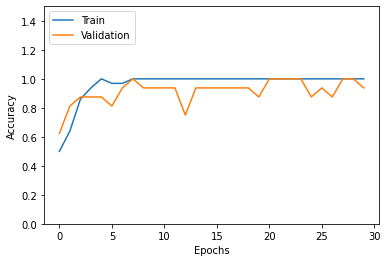

In [ ]:
# plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylim([0,1.5])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("3Dconvmodel2Pic2Datset2.png", dpi=300)

In [ ]:
train_accEns=history.history['acc']
val_accEns=history.history['val_acc']
print("Accuracy on Train set:", train_accEns[29])
print("Accuracy on Validation set:", val_accEns[29])

Accuracy on Train set: 1.0
Accuracy on Validation set: 0.93751147038269


In [ ]:
model_1_out=modelu_cnlst_1.predict(test_dataset_new)
model_2_out=modelu_cnlst_2.predict(test_dataset_new)

In [ ]:
model_out_final=np.hstack([model_1_out,model_2_out])

In [ ]:
#Test accuracy
ensemble_loss,ensemble_accuracy=model_ens.evaluate(model_out_final,test_labels)
ensemble_accuracy

1/1 [==============================] - 0s 2ms/step - loss: 0.0989 - acc: 0.9011
0.9011


In [ ]:
#mean AP
test_scores=model_ens.predict(model_out_final)
print("Mean average precision of the model:")
from sklearn.metrics import average_precision_score
print(average_precision_score(test_labels, test_scores))

Mean average precision of the model:
0.8621443256520063
